# Dealing with Overfitting

## 1. Reducing the Network's Size

In [2]:
from keras.datasets import mnist
from keras import layers, models

In [11]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [199]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

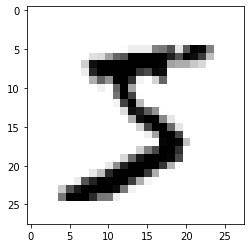

In [31]:
def show_image(img):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

show_image(train_data[0])

In [9]:
import numpy as np

In [16]:
x_train = np.asarray(train_data).astype('float32').reshape(60000, -1) / 255.0
x_test = np.asarray(test_data).astype('float32').reshape(10000, -1) / 255.0
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
print("x_train length: ", len(x_train))
print("x_test length: ", len(x_test))
print("y_train length: ", len(y_train))
print("y_test length: ", len(y_test))

x_train length:  60000
x_test length:  10000
y_train length:  60000
y_test length:  10000


In [18]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [26]:
ind = np.arange(0, 60000)
np.random.shuffle(ind)

In [28]:
x_train_shuffled = x_train[ind]
y_train_shuffled = y_train[ind]

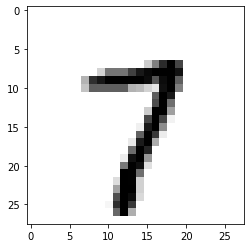

In [33]:
show_image(x_train_shuffled[0].reshape(28, 28))

In [35]:
## Split training data to Validation data and Training data
NUM_VAL = 10000
x_val = x_train_shuffled[:NUM_VAL]
x_train_partial = x_train_shuffled[NUM_VAL:]
y_val = y_train_shuffled[:NUM_VAL]
y_train_partial = y_train_shuffled[NUM_VAL:]

In [45]:
x_train_partial.shape

(50000, 784)

## Create a Network model

In [55]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [56]:
EPOCHS = 20

In [57]:
history = model.fit(x_train_partial, y_train_partial,
                    epochs=EPOCHS, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 13us/step - loss: 0.5608 - acc: 0.8453 - val_loss: 0.3074 - val_acc: 0.9090
Epoch 2/20
50000/50000 [==============================] - 1s 10us/step - loss: 0.2398 - acc: 0.9286 - val_loss: 0.2256 - val_acc: 0.9321
Epoch 3/20
50000/50000 [==============================] - 1s 10us/step - loss: 0.1749 - acc: 0.9485 - val_loss: 0.1718 - val_acc: 0.9489
Epoch 4/20
50000/50000 [==============================] - 1s 10us/step - loss: 0.1373 - acc: 0.9597 - val_loss: 0.1487 - val_acc: 0.9542
Epoch 5/20
50000/50000 [==============================] - 1s 10us/step - loss: 0.1132 - acc: 0.9663 - val_loss: 0.1350 - val_acc: 0.9601
Epoch 6/20
50000/50000 [==============================] - 1s 10us/step - loss: 0.0942 - acc: 0.9717 - val_loss: 0.1321 - val_acc: 0.9615
Epoch 7/20
50000/50000 [==============================] - 0s 10us/step - loss: 0.0797 - acc: 0.9768 - val_loss: 0.1122 - val_acc

In [59]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [64]:
acc = history.history['acc'][1:]
loss = history.history['loss'][1:]
val_acc = history.history['val_acc'][1:]
val_loss = history.history['val_loss'][1:]

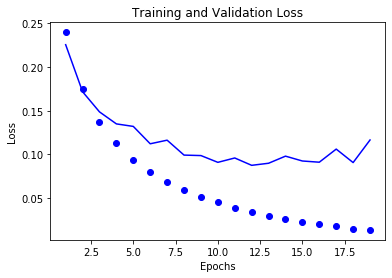

In [65]:
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

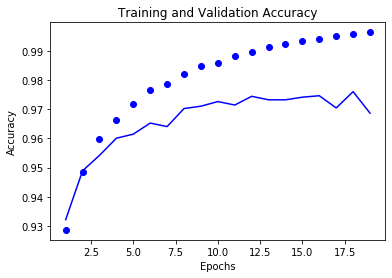

In [66]:
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## Retrain the model in only 12 epochs and whole Train data

In [75]:
model1 = models.Sequential()
model1.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))
model1.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [76]:
EPOCHS1 = 12

In [77]:
history = model1.fit(x_train, y_train,
                    epochs=EPOCHS1, batch_size=512)

Epoch 1/12
60000/60000 [==============================] - 1s 12us/step - loss: 0.4828 - acc: 0.8684
Epoch 2/12
60000/60000 [==============================] - 1s 9us/step - loss: 0.2157 - acc: 0.9361
Epoch 3/12
60000/60000 [==============================] - 1s 9us/step - loss: 0.1588 - acc: 0.9534
Epoch 4/12
60000/60000 [==============================] - 1s 9us/step - loss: 0.1261 - acc: 0.9622
Epoch 5/12
60000/60000 [==============================] - 1s 9us/step - loss: 0.1036 - acc: 0.9694
Epoch 6/12
60000/60000 [==============================] - 1s 9us/step - loss: 0.0860 - acc: 0.9742
Epoch 7/12
60000/60000 [==============================] - 1s 9us/step - loss: 0.0736 - acc: 0.9778
Epoch 8/12
60000/60000 [==============================] - 1s 9us/step - loss: 0.0636 - acc: 0.9808
Epoch 9/12
60000/60000 [==============================] - 1s 9us/step - loss: 0.0546 - acc: 0.9832
Epoch 10/12
60000/60000 [==============================] - 1s 9us/step - loss: 0.0484 - acc: 0.9853
Epoch 11

### Evaluate the Test Loss and Accuracy

In [78]:
results1 = model1.evaluate(x_test, y_test)
print("Test Evaluation loss: ", results1[0])
print("Test Evaluation acc: ", str(results1[1]*100) + "%")

10000/10000 [==============================] - 0s 24us/step
Test Evaluation loss:  0.08717634829226881
Test Evaluation acc:  97.34%


### Predict from Test data

In [79]:
y_pred = model1.predict(x_test)

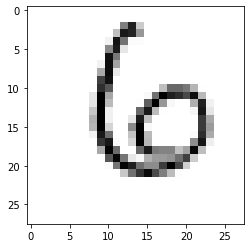

Sample image is:  6


In [90]:
SAMPLE = 100
show_image(x_test[SAMPLE].reshape(28, 28))
pred_label = np.argmax(y_pred[SAMPLE])
print("Sample image is: ", pred_label)

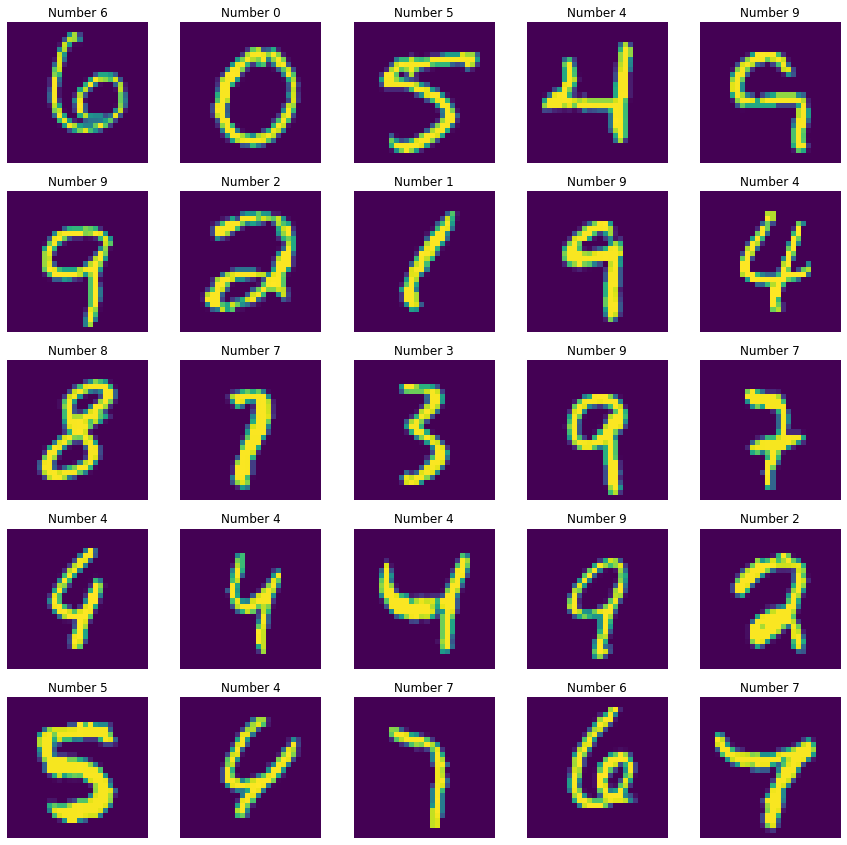

In [113]:
n_row, n_col = 5, 5
f, axarr = plt.subplots(n_row, n_col, figsize=(15, 15))
images = x_test[100: 100 + n_row*n_col]
pred_label = np.argmax(y_pred, axis=1)
print(pred_label)
labels = pred_label[100: 100 + n_row*n_col]
i = 0

for row in range(n_row):
    for col in range(n_col):
        axarr[row,col].imshow(images[i].reshape(28, 28))
        axarr[row,col].axis('off')
        axarr[row,col].title.set_text(f'Number {labels[i]}')
        i += 1

## Compare model performance with layer size variation

In [203]:
model_norm = models.Sequential()
model_norm.add(layers.Dense(128, activation='relu', input_shape=(28*28, )))
model_norm.add(layers.Dense(64, activation='relu'))
model_norm.add(layers.Dense(10, activation='softmax'))
model_norm.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])


model_wide = models.Sequential()
model_wide.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
model_wide.add(layers.Dense(256, activation='relu'))
model_wide.add(layers.Dense(10, activation='softmax'))
model_wide.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])


model_nar = models.Sequential()
model_nar.add(layers.Dense(64, activation='relu', input_shape=(28*28, )))
model_nar.add(layers.Dense(32, activation='relu'))
model_nar.add(layers.Dense(10, activation='softmax'))
model_nar.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])


model_more = models.Sequential()
model_more.add(layers.Dense(128, activation='relu', input_shape=(28*28, )))
model_more.add(layers.Dense(64, activation='relu'))
model_more.add(layers.Dense(64, activation='relu'))
model_more.add(layers.Dense(10, activation='softmax'))
model_more.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])


model_less = models.Sequential()
model_less.add(layers.Dense(64, activation='relu', input_shape=(28*28, )))
model_less.add(layers.Dense(10, activation='softmax'))
model_less.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])

In [204]:
EPOCHS = 500

In [205]:
history_norm = model_norm.fit(x_train_partial, y_train_partial,
                              epochs=EPOCHS, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

In [206]:
history_wide = model_wide.fit(x_train_partial, y_train_partial,
                              epochs=EPOCHS, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

In [207]:
history_nar = model_nar.fit(x_train_partial, y_train_partial,
                              epochs=EPOCHS, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

In [208]:
history_more = model_more.fit(x_train_partial, y_train_partial,
                              epochs=EPOCHS, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

In [209]:
history_less = model_less.fit(x_train_partial, y_train_partial,
                              epochs=EPOCHS, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

In [210]:
histories = [history_norm.history, history_wide.history, history_nar.history, history_more.history,
             history_less.history]

In [211]:
history_norm.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [212]:
titles = ["history_norm", "history_wide", "history_nar", "history_more", "history_less"]

In [222]:
acc = [hist["acc"] for hist in histories]
loss = [hist["loss"] for hist in histories]
val_acc = [hist["val_acc"] for hist in histories]
val_loss = [hist["val_loss"] for hist in histories]

In [223]:
epochs = range(1, len(acc[0])+1)

In [224]:
colors_o = ["bo", "go", "ro", "co", "mo"]
colors = ["b", "g", "r", "c", "m"]

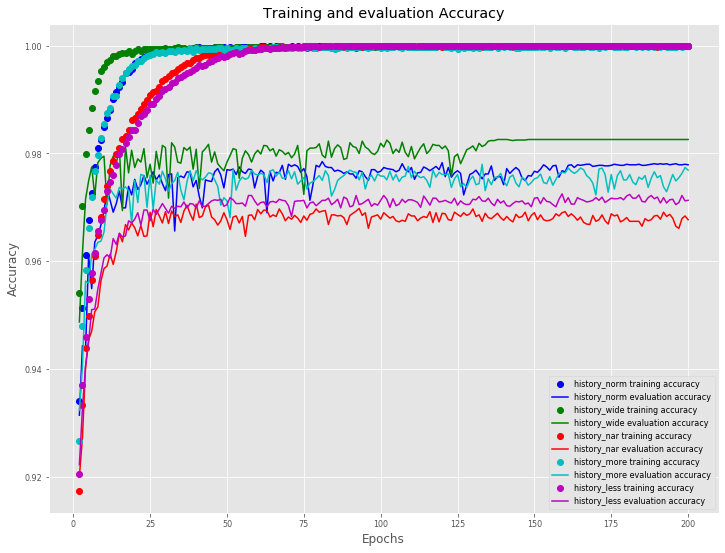

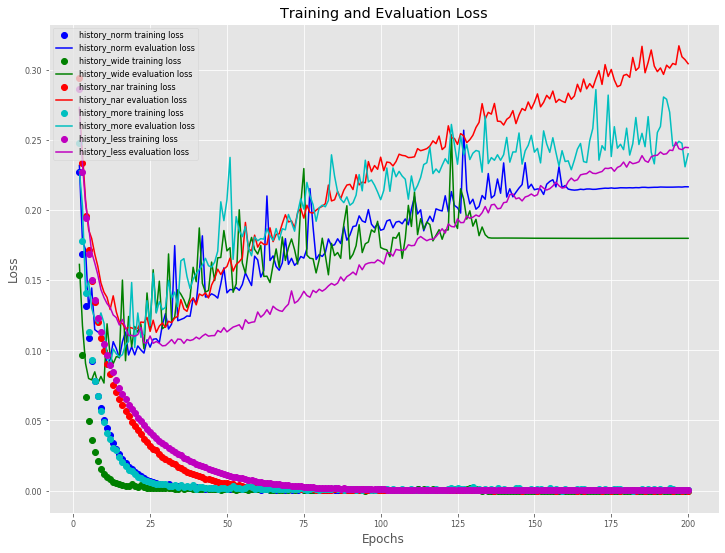

In [235]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
for i in range(len(acc)):
    plt.plot(epochs[1:200], acc[i][1:200], colors_o[i], label=titles[i]+" training accuracy")
    plt.plot(epochs[1:200], val_acc[i][1:200], colors[i], label=titles[i]+" evaluation accuracy")


plt.title("Training and evaluation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


for i in range(len(acc)):
    plt.plot(epochs[1:200], loss[i][1:200], colors_o[i], label=titles[i]+" training loss")
    plt.plot(epochs[1:200], val_loss[i][1:200], colors[i], label=titles[i]+" evaluation loss")


plt.title("Training and Evaluation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Conclusion

- It seems like overfitting is faster with higher number of trainable parameters like in the model_wide and the model_more models.
- But the accuracy that can be achieved with higher number of trainable parameters is also higher since the computation power of the model also Increases.